In [13]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path_to_um_build_dir="/Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc/"
path_to_build_dir_with_scl_11_test=path_to_um_build_dir+"/tutorials/scl-11"

%cd {path_to_build_dir_with_scl_11_test}

mbconvert="/Users/likask/mofem_install/spack/opt/spack/darwin-bigsur-skylake/apple-clang-13.0.0/moab-5.3.0-dzgcpvccvq4puezkjzxbgniorggv4jc5/bin/mbconvert"

/Users/likask/mofem_install/mofem-cephas/mofem/users_modules/um-build-Debug-wfhshlc/tutorials/scl-11


In [32]:
def run_test(order, penalty, phi, nitche):
  !./poisson_2d_dis_galerkin \
    -file_name mesh2d.cub \
    -order {order} -penalty {penalty} -phi {phi} -nitsche {nitche} 2>&1 | tee log
  l2_norm =!grep L2 log | tail -n 1 | awk '{print $6}'
  l2_norm = float(l2_norm[0])
  energy_norm =!grep Energetic log | awk '{print $6}'
  energy_norm = float(energy_norm[0])
  h1_norm =!grep H1 log | awk '{print $6}'
  h1_norm = float(h1_norm[0])       
  return [l2_norm, energy_norm, h1_norm]
  
[l2_norm, energy_norm, h1_norm] = run_test(1, 1e2, -1, 0)
print('L2 norm %6.4e ' % l2_norm)
print('Energy norm %6.4e ' % energy_norm)
print('H1 norm %6.4e ' % h1_norm)

!{mbconvert} out_result.h5m out_result.vtk

[0] <inform> MoFEM version 0.13.0 (MOAB 5.3.0 Petsc Release Version 3.16.1, Nov 01, 2021 )
[0] <inform> git commit id 4b6c0696659e08b4f78b7e0d538f701093d5c260
[0] <inform> Local time: 2022-Mar-19 11:20:47
[0] <inform> UTC time: 2022-Mar-19 11:20:47
[0] <inform> [MeshsetMng] meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> Set order: 1
[0] <inform> Set penalty: 100
[0] <inform> Set phi: -1
[0] <inform> Set nitche: 0
[0] <inform> [FieldCore] Add field U field_id 1 space L2 approximation base AINSWORTH_LOBATTO_BASE rank 1 meshset 12682136550675316747
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [FECore] Add finite element bFE
[0] <inform> [FECore] Add finite element sFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <inform> [FieldCore] Number of dofs 696
[0] <inform> [FECore] Finite element dFE added. Nb. of elements added 232
[0] <inform> [FECore]

In [33]:
penalty = 1e1
order_list = []
l2_norm_phi_m_1_list = []
l2_norm_phi_0_list = []
l2_norm_phi_1_list = []
l2_norm_phi_penalty_list = []
energy_norm_phi_m_1_list = []
energy_norm_phi_0_list = []
energy_norm_phi_1_list = []
energy_norm_phi_penalty_list = []
dofs_list=[]
for o in range(1, 8):
  print('Order %d' % o)
  order_list.append(o)
  p = o*(o+1)*penalty
  
  [l2_norm_phi_m_1, energy_norm_phi_m_1, h1_norm_phi_m_1] = run_test(o, p, -1, 1)
  [l2_norm_phi_0, energy_norm_phi_0, h1_norm_phi_0] = run_test(o, p, 0, 1)
  [l2_norm_phi_1, energy_norm_phi_1, h1_norm_phi_1] = run_test(o, p, 1, 1)
  [l2_norm_penalty, energy_norm_penalty, h1_norm_penalty] = run_test(o, p, 0, 0)
  
  l2_norm_phi_m_1_list.append(l2_norm_phi_m_1)
  l2_norm_phi_0_list.append(l2_norm_phi_0)
  l2_norm_phi_1_list.append(l2_norm_phi_1)
  l2_norm_phi_penalty_list.append(l2_norm_penalty)
  
  energy_norm_phi_m_1_list.append(energy_norm_phi_m_1)
  energy_norm_phi_0_list.append(energy_norm_phi_0)
  energy_norm_phi_1_list.append(energy_norm_phi_1)
  energy_norm_phi_penalty_list.append(energy_norm_penalty)
  
  nb_dofs=!grep DOFs log
  nb_dofs=int(nb_dofs[0].split()[-1])
  dofs_list.append(nb_dofs)


Order 1
[0] <inform> MoFEM version 0.13.0 (MOAB 5.3.0 Petsc Release Version 3.16.1, Nov 01, 2021 )
[0] <inform> git commit id 4b6c0696659e08b4f78b7e0d538f701093d5c260
[0] <inform> Local time: 2022-Mar-19 11:20:52
[0] <inform> UTC time: 2022-Mar-19 11:20:52
[0] <inform> [MeshsetMng] meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> Set order: 1
[0] <inform> Set penalty: 20
[0] <inform> Set phi: -1
[0] <inform> Set nitche: 1
[0] <inform> [FieldCore] Add field U field_id 1 space L2 approximation base AINSWORTH_LOBATTO_BASE rank 1 meshset 12682136550675316747
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [FECore] Add finite element bFE
[0] <inform> [FECore] Add finite element sFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <inform> [FieldCore] Number of dofs 696
[0] <inform> [FECore] Finite element dFE added. Nb. of elements added 232
[0] <inform> [

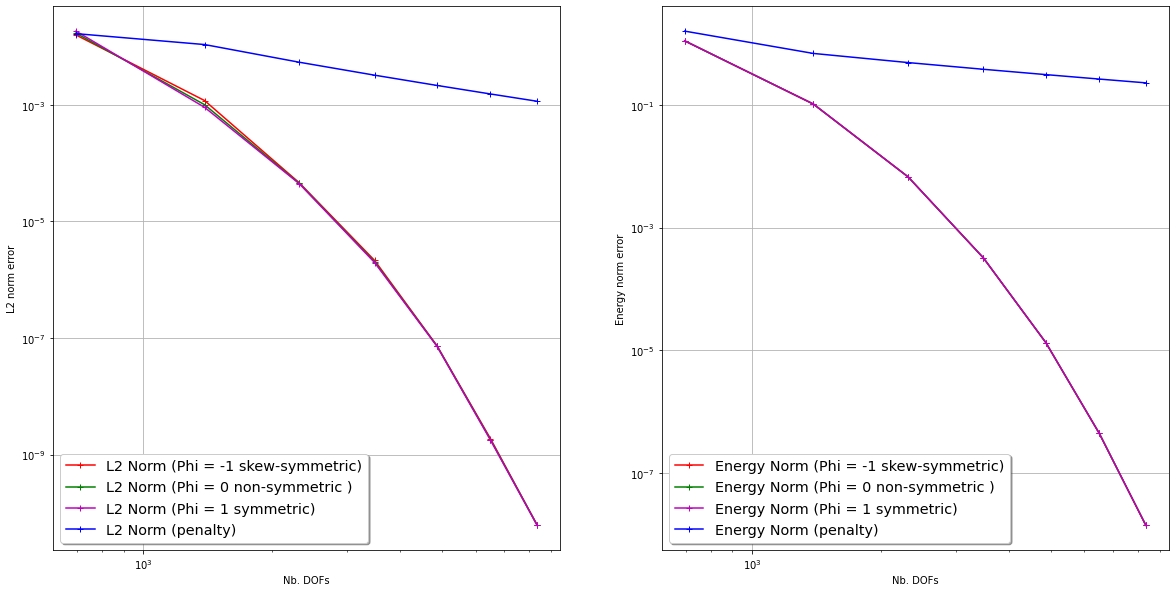

In [151]:
# plot
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots(1,2)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].plot(dofs_list, l2_norm_phi_m_1_list, 'r+-', label='L2 Norm (Phi = -1 skew-symmetric)') 
ax[0].plot(dofs_list, l2_norm_phi_0_list, 'g+-', label='L2 Norm (Phi = 0 non-symmetric )') 
ax[0].plot(dofs_list, l2_norm_phi_1_list, 'm+-', label='L2 Norm (Phi = 1 symmetric)')
ax[0].plot(dofs_list, l2_norm_phi_penalty_list, 'b+-', label='L2 Norm (penalty)') 
ax[0].set_xlabel('Nb. DOFs')
ax[0].set_ylabel('L2 norm error')
legend = ax[0].legend(loc='lower left', shadow=True, fontsize='x-large')
ax[0].grid(True);
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot(dofs_list, energy_norm_phi_m_1_list, 'r+-', label='Energy Norm (Phi = -1 skew-symmetric)') 
ax[1].plot(dofs_list, energy_norm_phi_0_list, 'g+-', label='Energy Norm (Phi = 0 non-symmetric )') 
ax[1].plot(dofs_list, energy_norm_phi_1_list, 'm+-', label='Energy Norm (Phi = 1 symmetric)')
ax[1].plot(dofs_list, energy_norm_phi_penalty_list, 'b+-', label='Energy Norm (penalty)') 
ax[1].set_xlabel('Nb. DOFs')
ax[1].set_ylabel('Energy norm error')
legend = ax[1].legend(loc='lower left', shadow=True, fontsize='x-large')
ax[1].grid(True)

In [139]:
o = 6
l2_norm_phi_m_1_list = []
l2_norm_phi_0_list = []
l2_norm_phi_1_list = []
l2_norm_phi_penalty_list = []
energy_norm_phi_m_1_list = []
energy_norm_phi_0_list = []
energy_norm_phi_1_list = []
energy_norm_phi_penalty_list = []
dofs_list=[]
penalty_list=[]
for x in range(0, 8):
  p = 4**x
  print('Penalty %d' % p)
  penalty_list.append(p)
  
  [l2_norm_phi_m_1, energy_norm_phi_m_1, h1_norm_phi_m_1] = run_test(o, p, -1, 1)
  [l2_norm_phi_0, energy_norm_phi_0, h1_norm_phi_0] = run_test(o, p, 0, 1)
  [l2_norm_phi_1, energy_norm_phi_1, h1_norm_phi_1] = run_test(o, p, 1, 1)
  [l2_norm_penalty, energy_norm_penalty, h1_norm_penalty] = run_test(o, p, 0, 0)
  
  l2_norm_phi_m_1_list.append(l2_norm_phi_m_1)
  l2_norm_phi_0_list.append(l2_norm_phi_0)
  l2_norm_phi_1_list.append(l2_norm_phi_1)
  l2_norm_phi_penalty_list.append(l2_norm_penalty)
  
  energy_norm_phi_m_1_list.append(energy_norm_phi_m_1)
  energy_norm_phi_0_list.append(energy_norm_phi_0)
  energy_norm_phi_1_list.append(energy_norm_phi_1)
  energy_norm_phi_penalty_list.append(energy_norm_penalty)
  
  nb_dofs=!grep DOFs log
  nb_dofs=int(nb_dofs[0].split()[-1])
  dofs_list.append(nb_dofs)


Penalty 1
[0] <inform> MoFEM version 0.13.0 (MOAB 5.3.0 Petsc Release Version 3.16.1, Nov 01, 2021 )
[0] <inform> git commit id 4b6c0696659e08b4f78b7e0d538f701093d5c260
[0] <inform> Local time: 2022-Mar-18 20:23:4
[0] <inform> UTC time: 2022-Mar-18 20:23:4
[0] <inform> [MeshsetMng] meshset 12682136550675316746 type BLOCKSET UNKNOWNNAME msId 1 name BOUNDARY_CONDITION block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 1
[0] <inform> Set order: 6
[0] <inform> Set penalty: 1
[0] <inform> Set phi: -1
[0] <inform> Set nitche: 1
[0] <inform> [FieldCore] Add field U field_id 1 space L2 approximation base AINSWORTH_LOBATTO_BASE rank 1 meshset 12682136550675316747
[0] <inform> [FECore] Add finite element dFE
[0] <inform> [FECore] Add finite element bFE
[0] <inform> [FECore] Add finite element sFE
[0] <inform> [ProblemCore] Add problem SimpleProblem
[0] <inform> [FieldCore] Number of dofs 6496
[0] <inform> [FECore] Finite element dFE added. Nb. of elements added 232
[0] <inform> [

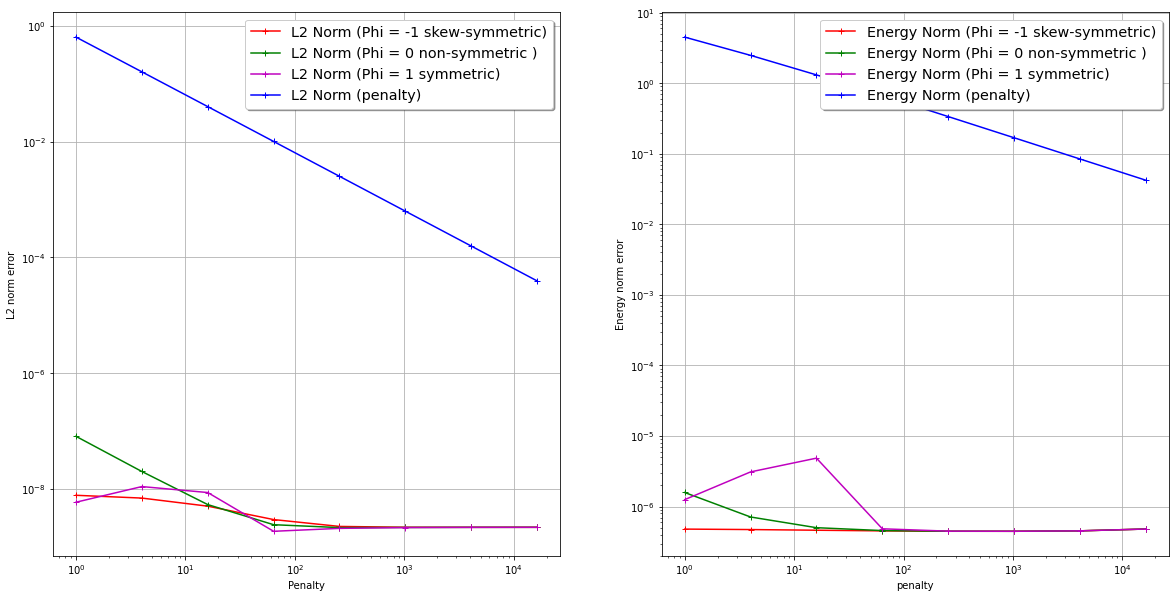

In [143]:
# plot
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots(1,2)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].plot(penalty_list, l2_norm_phi_m_1_list, 'r+-', label='L2 Norm (Phi = -1 skew-symmetric)') 
ax[0].plot(penalty_list, l2_norm_phi_0_list, 'g+-', label='L2 Norm (Phi = 0 non-symmetric )') 
ax[0].plot(penalty_list, l2_norm_phi_1_list, 'm+-', label='L2 Norm (Phi = 1 symmetric)')
ax[0].plot(penalty_list, l2_norm_phi_penalty_list, 'b+-', label='L2 Norm (penalty)') 
ax[0].set_xlabel('Penalty')
ax[0].set_ylabel('L2 norm error')
legend = ax[0].legend(loc='upper right', shadow=True, fontsize='x-large')
ax[0].grid(True);
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot(penalty_list, energy_norm_phi_m_1_list, 'r+-', label='Energy Norm (Phi = -1 skew-symmetric)') 
ax[1].plot(penalty_list, energy_norm_phi_0_list, 'g+-', label='Energy Norm (Phi = 0 non-symmetric )') 
ax[1].plot(penalty_list, energy_norm_phi_1_list, 'm+-', label='Energy Norm (Phi = 1 symmetric)')
ax[1].plot(penalty_list, energy_norm_phi_penalty_list, 'b+-', label='Energy Norm (penalty)') 
ax[1].set_xlabel('penalty')
ax[1].set_ylabel('Energy norm error')
legend = ax[1].legend(loc='upper right', shadow=True, fontsize='x-large')
ax[1].grid(True)